In [ ]:
import time
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import tensorflow as tf
import io
import numpy as np
import re

BOS = '<start>'
EOS = '<end>'
UTF_8 = 'UTF-8'

def preprocess_sentence(w, max_length):
    w = w.lower().strip()
    w = re.sub(r"([-¿])", r" \1 ", w)
    #w = re.sub(r"-", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = w.strip()

    # Truncate Length up to ideal_length
    w = " ".join(w.split()[:max_length+1])

    # Add start and end token
    w = '{} {} {}'.format(BOS, w, EOS)
    # w = '{} {}'.format(w, EOS)
    return w

num_examples = 300000
num_examples_val = 1000
inp_lines = io.open('/content/drive/MyDrive/Colab Notebooks/data/train/train.vi', encoding=UTF_8).read().strip().split('\n')[:num_examples]
targ_lines = io.open('/content/drive/MyDrive/Colab Notebooks/data/train/train.en', encoding=UTF_8).read().strip().split('\n')[:num_examples]
inp_lines_val = io.open('/content/drive/MyDrive/Colab Notebooks/data/validation/validation.vi', encoding=UTF_8).read().strip().split('\n')[:num_examples_val]
targ_lines_val = io.open('/content/drive/MyDrive/Colab Notebooks/data/validation/validation.en', encoding=UTF_8).read().strip().split('\n')[:num_examples_val]

print(inp_lines[14])
print(targ_lines[14])
max_length = 100

inp_lines = [preprocess_sentence(inp, max_length) for inp in inp_lines]
targ_lines = [preprocess_sentence(targ, max_length) for targ in targ_lines]
inp_lines_val = [preprocess_sentence(inp, max_length) for inp in inp_lines_val]
targ_lines_val = [preprocess_sentence(targ, max_length) for targ in targ_lines_val]

print(inp_lines[14])
print(targ_lines[14])
print(inp_lines_val[14])
print(targ_lines_val[14])
# Tạo một đối tượng Tokenizer
inp_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=' \t\n')
targ_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=' \t\n')

# Xây dựng từ điển từ bộ dữ liệu
#inp_tokenizer.fit_on_texts(inp_lines + inp_lines_val)
#targ_tokenizer.fit_on_texts(targ_lines + targ_lines_val)

inp_tokenizer.fit_on_texts(inp_lines)
targ_tokenizer.fit_on_texts(targ_lines)
# Lấy từ điển từ và gán chỉ số từ
inp_to_index = inp_tokenizer.word_index
targ_to_index = targ_tokenizer.word_index

print(len(inp_tokenizer.word_counts))
print(len(targ_tokenizer.word_counts))

# print(inp_to_index)
# print(targ_to_index)

inp_tensor = inp_tokenizer.texts_to_sequences(inp_lines)
targ_tensor = targ_tokenizer.texts_to_sequences(targ_lines)
inp_val_tensor = inp_tokenizer.texts_to_sequences(inp_lines_val)
targ_val_tensor = targ_tokenizer.texts_to_sequences(targ_lines_val)

print(inp_tensor[14])
print(targ_tensor[14])

print(inp_val_tensor[14])
print(targ_val_tensor[14])

inp_tensor = tf.keras.preprocessing.sequence.pad_sequences(inp_tensor, padding='post', maxlen=max_length)
targ_tensor = tf.keras.preprocessing.sequence.pad_sequences(targ_tensor, padding='post', maxlen=max_length)
inp_val_tensor = tf.keras.preprocessing.sequence.pad_sequences(inp_val_tensor, padding='post', maxlen=max_length)
targ_val_tensor = tf.keras.preprocessing.sequence.pad_sequences(targ_val_tensor, padding='post', maxlen=max_length)

inp_tensor = tf.convert_to_tensor(inp_tensor, dtype=tf.int64)
targ_tensor = tf.convert_to_tensor(targ_tensor, dtype=tf.int64)
inp_val_tensor = tf.convert_to_tensor(inp_val_tensor, dtype=tf.int64)
targ_val_tensor = tf.convert_to_tensor(targ_val_tensor, dtype=tf.int64)


Một trong số những phân tử tôi nghiên cứu tên là isoprene . Đây . Nó là một phân tử hữu cơ nhỏ . Có thể các bạn cũng chưa từng nghe tên .
And one of the molecules I study is called isoprene , which is here . It is a small organic molecule . You have probably never heard of it .
<start> một trong số những phân tử tôi nghiên cứu tên là isoprene . đây . nó là một phân tử hữu cơ nhỏ . có thể các bạn cũng chưa từng nghe tên . <end>
<start> and one of the molecules i study is called isoprene , which is here . it is a small organic molecule . you have probably never heard of it . <end>
<start> vào giữa những năm 90 , bắc triều tiên trải qua một nạn đói trầm trọng . <end>
<start> a huge famine hit north korea in the mid - 1990s . <end>
21143
42665
[1, 8, 18, 81, 11, 286, 365, 6, 269, 215, 344, 7, 6543, 4, 41, 4, 25, 7, 8, 286, 365, 644, 135, 225, 4, 9, 19, 20, 15, 79, 274, 243, 246, 344, 4, 2]
[2, 6, 41, 9, 5, 1145, 12, 464, 8, 150, 18271, 1, 74, 8, 78, 4, 14, 8, 10, 272, 1839, 1421, 4, 15, 21

In [ ]:
def texts_to_sequences(tokenizer, sentences):
    tar = []
    for word in sentences.split():
        if tokenizer.word_index.get(word) != None :
            tar.append(tokenizer.word_index.get(word))
    return tar

In [ ]:
inp = texts_to_sequences(inp_tokenizer, inp_lines[3])
inp = tf.convert_to_tensor(inp, dtype=tf.int64)
inp

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([   1,    9,   11,  794,  559,   34,   37,   21,   39,  557,   35,
        300,  148,  396,  696,    3,    5,   34,   37,   21,   39,   40,
         35,  260,  201,   13,  396,  104, 1802, 1613,    4,    2])>

In [ ]:
# Định nghĩa hyperparameters
batch_size = 126
buffer_size = 8

# Tạo dataset từ inp_tensor và targ_tensor
dataset = tf.data.Dataset.from_tensor_slices((inp_tensor, targ_tensor))

# Pha trộn và phân lô dữ liệu
dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

# Đặt kiểu dữ liệu của batch
dataset = dataset.map(lambda x, y: (tf.cast(x, tf.int64), tf.cast(y, tf.int64)))

# Đặt prefetch để tải dữ liệu mẫu tiếp theo trong quá trình huấn luyện
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
# Tạo dataset từ inp_tensor và targ_tensor
val_dataset = tf.data.Dataset.from_tensor_slices((inp_val_tensor, targ_val_tensor))

# Pha trộn và phân lô dữ liệu
val_dataset = val_dataset.shuffle(buffer_size).batch(32, drop_remainder=True)

# Đặt kiểu dữ liệu của batch
val_dataset = val_dataset.map(lambda x, y: (tf.cast(x, tf.int64), tf.cast(y, tf.int64)))

# Đặt prefetch để tải dữ liệu mẫu tiếp theo trong quá trình huấn luyện
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # Sinusoid
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # Sinusoid
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding,
                                            self.d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}

    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)

      attention_weights[f'decoder_layer{i+1}_block1'] = block1
      attention_weights[f'decoder_layer{i+1}_block2'] = block2

    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                             input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs, training):
    inp, tar = inputs

    enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)

    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

    return final_output, attention_weights

  def create_masks(self, inp, tar):
    enc_padding_mask = create_padding_mask(inp)

    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [ ]:
num_layers = 2
d_model = 100
dff = 16
num_heads = 10
dropout_rate = 0.1

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model, 2000)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.Mean(name='val_accuracy')

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=len(inp_tokenizer.word_counts) + 1,
    target_vocab_size=len(targ_tokenizer.word_counts) + 1,
    pe_input=1000,
    pe_target=1000,
    rate=dropout_rate)

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/checkpoints_vi_en/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print(f'{ckpt_manager.latest_checkpoint} Latest checkpoint restored!!')

/content/drive/MyDrive/Colab Notebooks/checkpoints_vi_en/train/ckpt-60 Latest checkpoint restored!!


In [ ]:
EPOCHS = 60

In [ ]:
loss_history = []
accuracy_history = []
loss_val_history = []
accuracy_val_history = []
bleu_history = []

In [ ]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]

  with tf.GradientTape() as tape:
    predictions, _ = transformer([inp, tar_inp],
                                 training = True)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

  train_loss(loss)
  train_accuracy(accuracy_function(tar_real, predictions))

In [ ]:
#@tf.function(input_signature=train_step_signature)
def validiate(val_dataset):
    val_loss.reset_states()
    val_accuracy.reset_states()
    for (batch, (inp, tar)) in enumerate(val_dataset):
        tar_inp = tar[:, :-1]
        tar_real = tar[:, 1:]

        predictions, _ = transformer([inp, tar_inp], training=False)
        loss = loss_function(tar_real, predictions)

        val_loss(loss)
        val_accuracy(accuracy_function(tar_real, predictions))
    bleu = calculate_bleu_scores(val_dataset)
    return val_loss.result(), val_accuracy.result(), bleu

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()

  train_loss.reset_states()
  train_accuracy.reset_states()

  for (batch, (inp, tar)) in enumerate(dataset):
    train_step(inp, tar)

    if batch % 50 == 0:
      print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  if (epoch + 1) >= 1:
    ckpt_save_path = ckpt_manager.save()
    print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

  loss_val, acc_val, bleu = validiate(val_dataset)

  loss_history.append(train_loss.result())
  accuracy_history.append(train_accuracy.result())
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  bleu_history.append(bleu)

  print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} - Accuracy {train_accuracy.result():.4f} \nValidation Loss {loss_val :.4f} - Validation Accuracy {acc_val :.4f} - BLEU {bleu :.4f}')

  print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

Epoch 1 Batch 0 Loss 2.3152 Accuracy 0.5685


KeyboardInterrupt: ignored

In [ ]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  2202632   
                                                                 
 decoder (Decoder)           multiple                  4436032   
                                                                 
 dense_32 (Dense)            multiple                  4309266   
                                                                 
Total params: 10,947,930
Trainable params: 10,947,930
Non-trainable params: 0
_________________________________________________________________


[6.3866887, 4.2414494, 3.5978982, 3.262321, 3.0822568, 2.9659817, 2.8868392, 2.8334324, 2.7914965, 2.7562568, 2.726, 2.7003, 2.6743, 2.6534, 2.6344, 2.616, 2.6008, 2.5852, 2.571, 2.5586, 2.547, 2.5361, 2.5258, 2.5162, 2.5078, 2.4983, 2.4879, 2.4795, 2.4848504, 2.4756036, 2.4656465, 2.458256, 2.4519053, 2.4432135, 2.4370005, 2.4316525, 2.425504, 2.4187346, 2.41362, 2.4081423, 2.4032285, 2.3977928, 2.392769, 2.387062, 2.383745, 2.3780744, 2.3753722, 2.3705812, 2.365062, 2.361557]
[4.6589365, 3.6910791, 3.2480972, 3.0737479, 3.005255, 2.9797275, 2.9452791, 2.9334836, 2.9599898, 2.93626, 2.9052, 2.8771, 2.8708, 2.8702, 2.8792, 2.8641, 2.8383, 2.8273, 2.8203, 2.8077, 2.8049, 2.7967, 2.7883, 2.8044, 2.7947, 2.811, 2.8081, 2.7975, 2.8394818, 2.826148, 2.81713, 2.8425868, 2.8346307, 2.8426676, 2.842454, 2.8382742, 2.8295624, 2.8383985, 2.838851, 2.8493814, 2.8498433, 2.8529537, 2.86052, 2.8543348, 2.8726373, 2.8615103, 2.8580103, 2.8633926, 2.8614097, 2.8614793]
[0.15571481, 0.34063765, 0.4030

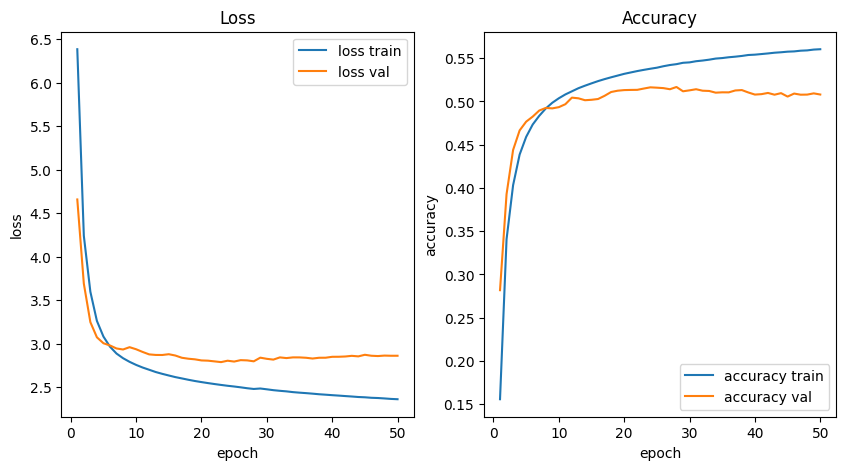

In [ ]:
figre, axs = plt.subplots(1, 2, figsize = (10, 5))

loss_train = [loss.numpy() for loss in loss_history]
loss_val = [loss.numpy() for loss in loss_val_history]
acc_train = [acc.numpy() for acc in accuracy_history]
acc_val = [acc.numpy() for acc in accuracy_val_history]

print(loss_train)
print(loss_val)
print(acc_train)
print(acc_val)

ep = list(range(1, len(loss_train) + 1))

axs[0].plot(ep, loss_train, label = 'loss train')
axs[0].plot(ep, loss_val, label = 'loss val')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].set_title('Loss')
axs[0].legend()

axs[1].plot(ep, acc_train, label = 'accuracy train')
axs[1].plot(ep, acc_val, label = 'accuracy val')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].set_title('Accuracy')
axs[1].legend()


In [ ]:
class Translator(tf.Module):
  def __init__(self, inp_tokenizer, targ_tokenizer, transformer):
    self.inp_tokenizer = inp_tokenizer
    self.targ_tokenizer = targ_tokenizer
    self.transformer = transformer

  def __call__(self, sentence, max_length=30):
    sentence = texts_to_sequences(self.inp_tokenizer, sentence)
    sentence = tf.convert_to_tensor(sentence, dtype=tf.int64)
    encoder_input = sentence

    encoder_input = tf.expand_dims(encoder_input, 0)


    start = targ_tokenizer.word_index.get(BOS)
    start = tf.cast(tf.expand_dims(start, 0), tf.int64)
    end = targ_tokenizer.word_index.get(EOS)

    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions, _ = self.transformer([encoder_input, output], training=False)
      predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)

      predicted_id = tf.argmax(predictions, axis=-1)

      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    _, attention_weights = self.transformer([encoder_input, output[:,:-1]], training=False)

    output = tf.squeeze(output)
    output = output.numpy().tolist()

    text = ""
    for index in output:
      text += targ_tokenizer.index_word.get(int(index)) + " "

    return text, attention_weights

In [ ]:
translator = Translator(inp_tokenizer, targ_tokenizer, transformer)

In [ ]:
def compute_bleu_score(inp_dataset, targ_dataset, translator):
  smoother = SmoothingFunction().method4
  bleu = []
  for idx in range(len(inp_dataset)):
    predict, _ = translator(inp_dataset[idx], max_length=100)
    predict_tok = predict.split(' ')[1:-1]
    truth_tok = [targ_dataset[idx].split(' ')[1:-1]]
    bleu_score = nltk.translate.bleu_score.sentence_bleu(truth_tok, predict_tok, smoothing_function=smoother)
    bleu.append(bleu_score)
    if idx % 50 == 0:
      print(f'{idx} - BLEU score = {sum(bleu) / len(bleu)}')
  return sum(bleu) / len(bleu)

In [ ]:
BLEU = compute_bleu_score(inp_lines_val, targ_lines_val, translator)
print("BLEU = ", BLEU)

0 - BLEU score = 0.10239419768442021
50 - BLEU score = 0.14176296583451442
100 - BLEU score = 0.143481955781363
150 - BLEU score = 0.1614889846982318
200 - BLEU score = 0.1593237373794859
250 - BLEU score = 0.16861810127814358
300 - BLEU score = 0.16802228596780278
350 - BLEU score = 0.16865303250017197
400 - BLEU score = 0.17452875129894768
450 - BLEU score = 0.17722004962827792
500 - BLEU score = 0.18207127686860297
550 - BLEU score = 0.17806637048673776
600 - BLEU score = 0.17431344953414832
650 - BLEU score = 0.17474614158774335
700 - BLEU score = 0.17863523852492916
750 - BLEU score = 0.18071589522396306
800 - BLEU score = 0.1803290224596161
850 - BLEU score = 0.17986607623076512
900 - BLEU score = 0.1838915520447549
950 - BLEU score = 0.18440983028571428
BLEU =  0.18701258747108399


In [ ]:
class ExportTranslator(tf.Module):
  def __init__(self, translator):
    self.translator = translator

  def process_sentence(self, w, max_length):
    w = w.lower().strip()
    w = re.sub(r"([-¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = w.strip()
    w = " ".join(w.split()[:max_length+1])
    w = '{} {} {}'.format(BOS, w, EOS)
    return w

  def __call__(self, sentence):
    (result,
     attention_weights) = self.translator(self.process_sentence(sentence, max_length=100), max_length=100)

    return result

In [ ]:
model = ExportTranslator(translator)

In [ ]:
model("Tại sao tôi đã làm như vậy ? nó thật là kì cục .")

'<start> why did i do that ? it was the weird . <end> '

In [ ]:
tf.saved_model.save(model, export_dir='translation')

In [ ]:
sens = [
    'Tôi đang học tiếng Anh .',
    'Hôm nay trời rất nắng .',
    'Quả cam này ngọt ngon quá .',
    'Buổi sáng tôi thường chạy bộ .',
    'Công việc của tôi khá bận rộn .',
    'Một chiếc xe đạp màu đỏ .',
    'Những bông hoa đang nở rộ .',
    'Bàn làm việc của tôi rất gọn gàng .',
    'Bạn có muốn đi xem phim không ?',
    'Tôi thích nghe nhạc vào buổi tối .'
]

for sen in sens:
  print(f'{sen:50s}: ', end = ' ')
  print(" ".join(model(sen).split(' ')[1:-2]))


Tôi đang học tiếng Anh .                          :  i am learning english .
Hôm nay trời rất nắng .                           :  today is very sunlight .
Quả cam này ngọt ngon quá .                       :  this is delicious .
Buổi sáng tôi thường chạy bộ .                    :  the morning i am going to run .
Công việc của tôi khá bận rộn .                   :  my job was pretty busy .
Một chiếc xe đạp màu đỏ .                         :  a red bike ride .
Những bông hoa đang nở rộ .                       :  the flowers are growing up .
Bàn làm việc của tôi rất gọn gàng .               :  my business is very simple .
Bạn có muốn đi xem phim không ?                   :  do you want to go to film ?
Tôi thích nghe nhạc vào buổi tối .                :  i like to hear music in the evening .


In [ ]:
senes = [
    "Trong chuyến du lịch vừa qua , tôi đã khám phá những ngôi đền cổ , thăm các thị trấn nhỏ và thưởng thức ẩm thực độc đáo của vùng đất đó .",
    "Cuối tuần này , gia đình tôi sẽ đi dạo chơi ở công viên , tận hưởng không gian xanh mát và tham gia các hoạt động vui chơi cùng nhau .",
    "Trong buổi tiệc sinh nhật của bạn bè , chúng tôi đã có một đêm vui vẻ với âm nhạc , tiếng cười và những món quà thú vị .",
    "Mỗi buổi sáng , tôi thích thức dậy sớm để tập thể dục và bắt đầu ngày mới với năng lượng tích cực .",
    "Đến nhà sách và mua sách mới là một thú vui riêng biệt của tôi , nơi tôi có thể thỏa sức đam mê đọc sách và khám phá thế giới tri thức .",
    "Tham gia các khóa học trực tuyến giúp tôi mở rộng kiến thức và nâng cao kỹ năng trong lĩnh vực tôi quan tâm .",
    "Trải nghiệm âm nhạc trực tiếp tại buổi hòa nhạc hoặc nhà hát là một trải nghiệm tuyệt vời , mang đến cảm xúc mạnh mẽ và kết nối với nghệ sĩ .",
    "Mỗi cuối tuần , tôi dành thời gian nghỉ ngơi và thư giãn bằng cách đi dạo trong công viên hoặc tận hưởng một buổi xem phim thú vị .",
    "Trong chuyến đi du lịch đến biển , tôi đã tham gia các hoạt động như lặn biển , lướt ván và tham quan các rạn san hô tuyệt đẹp .",
    "Việc tham gia các hoạt động tình nguyện giúp tôi đóng góp cho cộng đồng , gặp gỡ những người mới và trải nghiệm những điều mới mẻ ."
]

for sen in senes:
  print(f'{sen} ')
  print(" ".join(model(sen).split(' ')[1:-2]))
  print()

Trong chuyến du lịch vừa qua , tôi đã khám phá những ngôi đền cổ , thăm các thị trấn nhỏ và thưởng thức ẩm thực độc đáo của vùng đất đó . 
in the travel trip , i discovered the temple , visiting small towns and enjoy the unique food of that land .

Cuối tuần này , gia đình tôi sẽ đi dạo chơi ở công viên , tận hưởng không gian xanh mát và tham gia các hoạt động vui chơi cùng nhau . 
and at this end , my family would go for a park , in the park , the air that was cool and involved in the same activities .

Trong buổi tiệc sinh nhật của bạn bè , chúng tôi đã có một đêm vui vẻ với âm nhạc , tiếng cười và những món quà thú vị . 
in your birthday party , we have been having a night for music , laughter and funny for the gift .

Mỗi buổi sáng , tôi thích thức dậy sớm để tập thể dục và bắt đầu ngày mới với năng lượng tích cực . 
every morning , i liked the early morning to get up and start with the new energy of the positive energy .

Đến nhà sách và mua sách mới là một thú vui riêng biệt của 

In [ ]:
sens = [
    "Thật tuyệt vời !",
    "Sao không thú vị thế ?",
    "Bạn đã nhìn thấy nó chưa ?",
    "Bạn đang làm gì vậy ?",
    "Tôi không tin được !",
    "Hãy đến đây ngay !",
    "Điều đó có thể xảy ra sao ?",
    "Điều đó có phải là đúng không ?",
    "Bạn có biết điều này không ?",
    "Thế giới thật kỳ diệu !"
]

for sen in sens:
  print(f'{sen:50s}: ', end = ' ')
  print(" ".join(model(sen).split(' ')[1:-2]))

Thật tuyệt vời !                                  :  it is great !
Sao không thú vị thế ?                            :  why isnt it interesting ?
Bạn đã nhìn thấy nó chưa ?                        :  did you see it ?
Bạn đang làm gì vậy ?                             :  what are you doing ?
Tôi không tin được !                              :  i dont believe !
Hãy đến đây ngay !                                :  let is go right here .
Điều đó có thể xảy ra sao ?                       :  how could that happen ?
Điều đó có phải là đúng không ?                   :  that is true ?
Bạn có biết điều này không ?                      :  do you know this ?
Thế giới thật kỳ diệu !                           :  the world is amazing .


In [ ]:
sentences = [
    "Thật không thể tin được ! Mọi thứ đều trở nên tuyệt vời hơn mọi mong đợi .",
    "Đừng bao giờ nói với tôi những điều đó nữa ! Tôi đã đủ nghe rồi .",
    "Hãy giữ lấy giấc mơ của bạn và không bao giờ từ bỏ nó ",
    "Sao không dừng lại một chút ? Chúng ta cần thời gian để thưởng thức cuộc sống .",
    "Có chăng đó là một lời đề nghị không thể từ chối ? Tôi không thể chờ đợi để tham gia !",
    "Chúng ta đã đi qua bao nhiêu khó khăn và cuối cùng , chúng ta đã thành công !",
    "Xin lỗi , tôi không thể đồng ý với ý kiến của bạn . Tôi có quyền tự do biểu đạt suy nghĩ của mình .",
    "Hãy đến đây ngay lập tức ! Tôi cần bạn ở bên tôi trong khoảnh khắc này .",
    "Điều này liệu có thực sự xảy ra ? Tôi không thể tin nổi mắt mình .",
    "Xin hãy cho tôi một lời giải thích thỏa đáng ! Tôi muốn hiểu rõ vì sao điều đó lại xảy ra ."
]

for sen in sentences:
  print(f'{sen} ')
  print(" ".join(model(sen).split(' ')[1:-2]))
  print()

Thật không thể tin được ! Mọi thứ đều trở nên tuyệt vời hơn mọi mong đợi . 
it is impossible to believe ! everything is been more wonderful than the expectations .

Đừng bao giờ nói với tôi những điều đó nữa ! Tôi đã đủ nghe rồi . 
never told me that . i heard enough .

Hãy giữ lấy giấc mơ của bạn và không bao giờ từ bỏ nó  
keep your dreams and never giving it away .

Sao không dừng lại một chút ? Chúng ta cần thời gian để thưởng thức cuộc sống . 
why dont we stop ? we need time to enjoy life .

Có chăng đó là một lời đề nghị không thể từ chối ? Tôi không thể chờ đợi để tham gia ! 
it is a question that is not from the denied ? i cant wait to be waiting for the next .

Chúng ta đã đi qua bao nhiêu khó khăn và cuối cùng , chúng ta đã thành công ! 
we have been through how much difficulty , and we have been successful !

Xin lỗi , tôi không thể đồng ý với ý kiến của bạn . Tôi có quyền tự do biểu đạt suy nghĩ của mình . 
sorry , i cant agree with your idea . i have freedom to express my 